In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report
from xgboost import XGBClassifier
from keras.models import Sequential


In [2]:
df_train = pd.read_csv('dropout_train.csv')
df_test = pd.read_csv('dropout_test.csv')

In [3]:
df_train.head(5)

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,29,25,107,87,66,0,0,314,111,34,87,2.0,0.0,14,1.0,7.0,0
1,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,9,14,79,148,22,26,0,298,95,28,43,0.0,1.0,9,7.0,9.0,0
2,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,4,15,64,6,10,0,0,99,0,0,14,3.0,9.0,9,4.0,10.5,0
3,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,86,30,226,189,87,34,0,652,197,63,83,2.0,0.0,11,7.0,15.0,0
4,6,dpK33RH9yepUAnyoywRwBt1AJzxGlaja,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,2,5,12,2,2,0,0,23,23,12,12,27.0,1.0,2,203.0,203.0,0


In [4]:
df_test.head(5)

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,9,J1oRHoSJOInehnrxVdh32dK7QnDuCJWo,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,2,12,71,6,6,0,0,97,61,45,71,17.0,3.0,6,16.0,17.0,1
1,28,BoK7CAUaCFqnLgmWLxeOHg8YkXUSeCtc,TAYxxh39I2LZnftBpL0LfF2NxzrCKpkx,21,11,45,12,16,0,0,105,0,0,3,5.0,8.0,6,7.0,14.0,1
2,32,Jm4nQ05ndX10jbofbWx6S0r9VXrqia6S,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,1,9,27,13,16,7,0,73,58,20,27,18.0,0.0,5,11.5,18.0,0
3,46,hnewTKKnZRwEeXEZu9RmHHva1PDybMo2,KHPw0gmg1Ad3V07TqRpyBzA8mRjj7mkt,0,1,0,0,0,0,0,1,0,0,0,NaN,NaN,1,NaN,NaN,1
4,48,1ELMItXjpijnCZU4WKxvrVri8AjkR2gf,AXUJZGmZ0xaYSWazu8RQ1G5c76ECT1Kd,27,15,70,18,41,0,1,172,98,37,37,13.0,1.0,5,166.0,172.0,0


### Managing null values

In [5]:
le=LabelEncoder()
# df_train.columns

In [6]:
cols=['enrollment_id', 'username', 'course_id', 'n_videos', 'n_navigate',
       'n_access', 'n_problem', 'n_page_close', 'n_discussion', 'n_wiki',
       'n_events', 'n_events_lst_wk', 'n_access_lst_wk', 'n_access_lst2_wk',
       'days_course_strt_access1', 'days_course_end_access_lst',
       'unique_days_accessed', 'median_days_acs1_mod_rls',
       'median_days_acslst_mod_rls', 'dropout']

In [7]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

enrollment_id                     1
username                          0
course_id                         0
n_videos                          0
n_navigate                        0
n_access                          0
n_problem                         0
n_page_close                      0
n_discussion                      0
n_wiki                            0
n_events                          0
n_events_lst_wk                   0
n_access_lst_wk                   0
n_access_lst2_wk                  0
days_course_strt_access1      23305
days_course_end_access_lst    23305
unique_days_accessed              0
median_days_acs1_mod_rls      38001
median_days_acslst_mod_rls    38001
dropout                           0
dtype: int64
enrollment_id                    0
username                         0
course_id                        0
n_videos                         0
n_navigate                       0
n_access                         0
n_problem                        0
n_page_close          

In [8]:
df_train['days_course_strt_access1'].fillna(df_train['days_course_strt_access1'].mean(), inplace=True)
df_test['days_course_strt_access1'].fillna(df_test['days_course_strt_access1'].mean(), inplace=True)

In [9]:
df_train['days_course_end_access_lst'].fillna(df_train['days_course_end_access_lst'].mean(), inplace=True)
df_test['days_course_end_access_lst'].fillna(df_test['days_course_end_access_lst'].mean(), inplace=True)

In [10]:
df_train['median_days_acs1_mod_rls'].fillna(df_train['median_days_acs1_mod_rls'].mean(), inplace = True)
df_test['median_days_acs1_mod_rls'].fillna(df_test['median_days_acs1_mod_rls'].mean(), inplace = True)

In [11]:
df_train['median_days_acslst_mod_rls'].fillna(df_train['median_days_acslst_mod_rls'].mean(), inplace=True)
df_test['median_days_acslst_mod_rls'].fillna(df_test['median_days_acslst_mod_rls'].mean(), inplace=True)

In [12]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

enrollment_id                 1
username                      0
course_id                     0
n_videos                      0
n_navigate                    0
n_access                      0
n_problem                     0
n_page_close                  0
n_discussion                  0
n_wiki                        0
n_events                      0
n_events_lst_wk               0
n_access_lst_wk               0
n_access_lst2_wk              0
days_course_strt_access1      0
days_course_end_access_lst    0
unique_days_accessed          0
median_days_acs1_mod_rls      0
median_days_acslst_mod_rls    0
dropout                       0
dtype: int64
enrollment_id                 0
username                      0
course_id                     0
n_videos                      0
n_navigate                    0
n_access                      0
n_problem                     0
n_page_close                  0
n_discussion                  0
n_wiki                        0
n_events                   

In [13]:
df_train.dropna(subset = ['enrollment_id'],inplace=True)

In [14]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

enrollment_id                 0
username                      0
course_id                     0
n_videos                      0
n_navigate                    0
n_access                      0
n_problem                     0
n_page_close                  0
n_discussion                  0
n_wiki                        0
n_events                      0
n_events_lst_wk               0
n_access_lst_wk               0
n_access_lst2_wk              0
days_course_strt_access1      0
days_course_end_access_lst    0
unique_days_accessed          0
median_days_acs1_mod_rls      0
median_days_acslst_mod_rls    0
dropout                       0
dtype: int64
enrollment_id                 0
username                      0
course_id                     0
n_videos                      0
n_navigate                    0
n_access                      0
n_problem                     0
n_page_close                  0
n_discussion                  0
n_wiki                        0
n_events                   

### EDA

In [15]:
print(df_train.shape)
print(df_test.shape)

(96422, 20)
(24119, 20)


In [16]:
df_train.dtypes

enrollment_id                  object
username                       object
course_id                      object
n_videos                        int64
n_navigate                      int64
n_access                        int64
n_problem                       int64
n_page_close                    int64
n_discussion                    int64
n_wiki                          int64
n_events                        int64
n_events_lst_wk                 int64
n_access_lst_wk                 int64
n_access_lst2_wk                int64
days_course_strt_access1      float64
days_course_end_access_lst    float64
unique_days_accessed            int64
median_days_acs1_mod_rls      float64
median_days_acslst_mod_rls    float64
dropout                         int64
dtype: object

In [17]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_videos,96422.0,6.641617,14.739401,0.0,0.0,1.000000,6.000000,399.0
n_navigate,96422.0,8.401672,13.003210,0.0,2.0,4.000000,10.000000,649.0
n_access,96422.0,25.845564,54.421636,0.0,1.0,6.000000,26.000000,3659.0
n_problem,96422.0,10.677024,34.806000,0.0,0.0,0.000000,6.000000,1046.0
n_page_close,96422.0,10.272106,20.678830,0.0,0.0,2.000000,10.000000,400.0
n_discussion,96422.0,5.412945,36.838489,0.0,0.0,0.000000,2.000000,4360.0
n_wiki,96422.0,0.753915,4.006840,0.0,0.0,0.000000,1.000000,554.0
n_events,96422.0,68.004843,140.169806,1.0,5.0,17.000000,68.000000,5289.0
n_events_lst_wk,96422.0,16.089979,49.475653,0.0,0.0,0.000000,6.000000,1554.0
n_access_lst_wk,96422.0,6.362967,19.487810,0.0,0.0,0.000000,2.000000,655.0


In [18]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_videos,24119.0,6.655583,15.231255,0.0,0.0,1.000000,6.000000,536.0
n_navigate,24119.0,8.258800,12.858838,0.0,2.0,4.000000,9.000000,331.0
n_access,24119.0,25.708031,54.411000,0.0,1.0,6.000000,25.000000,1200.0
n_problem,24119.0,10.774410,36.610938,0.0,0.0,0.000000,6.000000,911.0
n_page_close,24119.0,10.257929,21.514683,0.0,0.0,2.000000,9.000000,521.0
n_discussion,24119.0,5.279116,42.223065,0.0,0.0,0.000000,2.000000,5321.0
n_wiki,24119.0,0.738546,3.523918,0.0,0.0,0.000000,1.000000,200.0
n_events,24119.0,67.672416,149.377373,1.0,5.0,17.000000,65.000000,7697.0
n_events_lst_wk,24119.0,15.739790,51.242057,0.0,0.0,0.000000,5.000000,2528.0
n_access_lst_wk,24119.0,6.186533,19.197543,0.0,0.0,0.000000,2.000000,442.0


In [19]:
df_train.corr()

C:\Users\bhang\AppData\Local\Temp\ipykernel_10380\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
n_videos,1.000000,0.605246,0.799885,0.614692,0.819637,0.291452,0.196296,0.827624,0.646041,0.628296,0.693042,-0.165714,-0.351476,0.667489,-0.016299,-0.003754,-0.419717
n_navigate,0.605246,1.000000,0.718028,0.488849,0.709246,0.499179,0.393316,0.803644,0.565011,0.521418,0.592772,-0.210092,-0.364973,0.779444,-0.071184,-0.056430,-0.458009
n_access,0.799885,0.718028,1.000000,0.672581,0.789888,0.357177,0.236858,0.923158,0.669930,0.701827,0.857470,-0.193592,-0.384758,0.754633,-0.052598,-0.037230,-0.463102
n_problem,0.614692,0.488849,0.672581,1.000000,0.523620,0.244517,0.142954,0.765029,0.587220,0.510619,0.575371,-0.144902,-0.273563,0.528258,-0.037192,-0.027689,-0.332045
n_page_close,0.819637,0.709246,0.789888,0.523620,1.000000,0.329098,0.244056,0.829678,0.636740,0.616018,0.680657,-0.198594,-0.404612,0.760250,-0.055038,-0.039508,-0.488870
n_discussion,0.291452,0.499179,0.357177,0.244517,0.329098,1.000000,0.402739,0.599224,0.393654,0.237985,0.275311,-0.094482,-0.131966,0.369242,-0.040581,-0.035284,-0.175558
n_wiki,0.196296,0.393316,0.236858,0.142954,0.244056,0.402739,1.000000,0.355022,0.219965,0.160917,0.193903,-0.070542,-0.114016,0.261791,-0.025101,-0.021505,-0.152813
n_events,0.827624,0.803644,0.923158,0.765029,0.829678,0.599224,0.355022,1.000000,0.729948,0.671745,0.781969,-0.204205,-0.385763,0.783342,-0.057477,-0.042676,-0.471505
n_events_lst_wk,0.646041,0.565011,0.669930,0.587220,0.636740,0.393654,0.219965,0.729948,1.000000,0.936158,0.760249,0.034659,-0.444268,0.556131,-0.016198,-0.006400,-0.436477
n_access_lst_wk,0.628296,0.521418,0.701827,0.510619,0.616018,0.237985,0.160917,0.671745,0.936158,1.000000,0.804828,0.036318,-0.450084,0.549626,-0.012193,-0.001637,-0.437364


In [20]:
for col1 in cols:
    df_train[col1] = le.fit_transform(df_train[col1])

In [21]:
for col2 in cols:
    df_test[col2] = le.fit_transform(df_test[col2])

In [22]:
df_train

,enrollment_id,username,course_id,n_videos,n_navigate,n_access,n_problem,n_page_close,n_discussion,n_wiki,n_events,n_events_lst_wk,n_access_lst_wk,n_access_lst2_wk,days_course_strt_access1,days_course_end_access_lst,unique_days_accessed,median_days_acs1_mod_rls,median_days_acslst_mod_rls,dropout
0,0,10231,13,29,25,107,87,66,0,0,313,111,34,87,2,0,13,95,96,0
1,59048,2011,5,9,14,79,148,22,26,0,297,95,28,43,0,1,8,107,100,0
2,64381,16554,13,4,15,64,6,10,0,0,98,0,0,14,3,9,8,101,103,0
3,69803,55199,5,86,30,226,189,87,34,0,649,197,63,83,2,0,10,107,112,0
4,75087,43211,11,2,5,12,2,2,0,0,22,23,12,12,28,1,1,422,414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96418,53752,23949,9,0,1,0,0,0,0,0,0,0,0,0,9,14,0,141,133,1
96419,53753,65146,9,0,1,0,0,0,0,0,0,0,0,0,9,14,0,141,133,1
96420,53754,27564,9,1,2,3,0,2,0,0,7,0,0,3,22,8,0,135,124,1
96421,53755,8347,9,0,1,0,0,0,0,0,0,0,0,0,9,14,0,141,133,1


<AxesSubplot: >

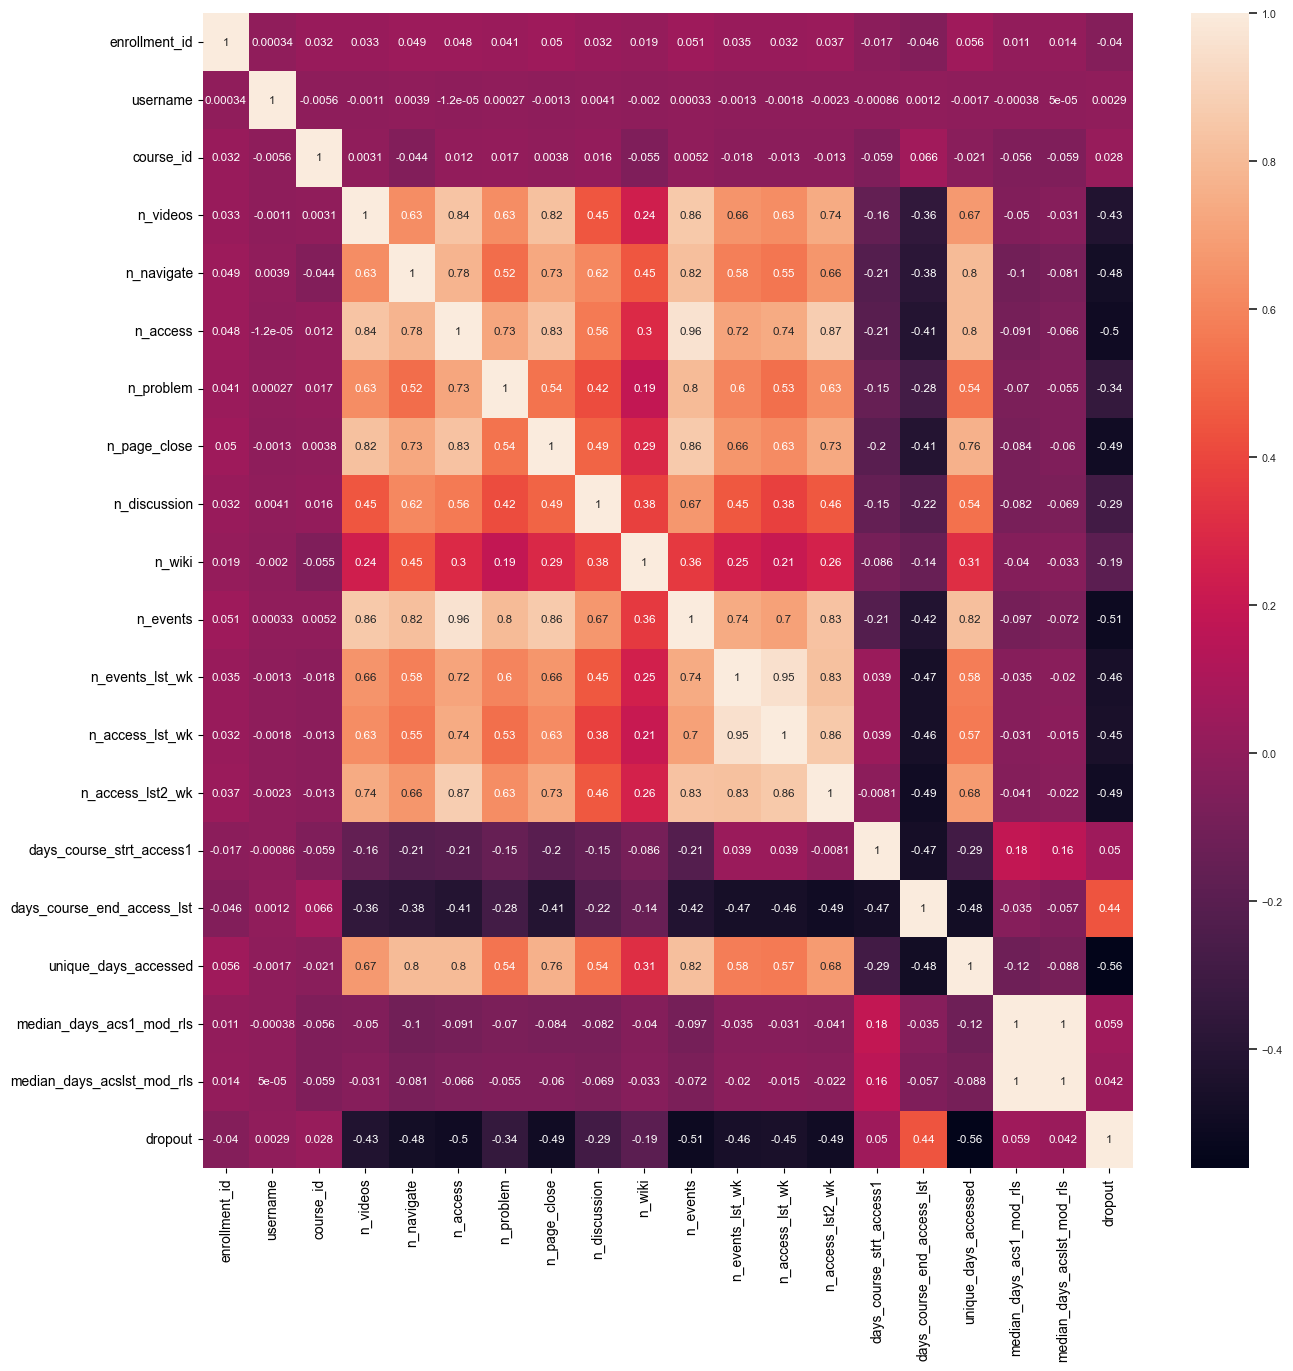

In [23]:
correlations = df_train.corr()
fig ,ax = plt.subplots(figsize=(15,15))
sns.set_theme(style = 'white', font_scale=0.7)
sns.heatmap(correlations, annot = True)

In [24]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(df_train,0.5)
len(set(corr_features))

11

In [26]:
x_train = df_train.iloc[:,:-1]

In [27]:
y_train = df_train.iloc[:,-1:]

In [28]:
x_test = df_test.iloc[:,:-1]

In [29]:
y_test = df_test.iloc[:,-1:]

In [30]:
# from sklearn.linear_model import LinearRegression 

In [31]:
# regressor=LinearRegression()
# regressor.fit(x_train,y_train)

In [32]:
# plt.scatter(x_train,y_train, color='red')
# plt.plot(x_train,regressor.predict(x_train), color = 'Blue')
# plt.title('Plotting of Training Data')

## Random Forest Algorithm

In [33]:
clf = RandomForestClassifier()

In [34]:
clf.fit(x_train,y_train)

C:\Users\bhang\AppData\Local\Temp\ipykernel_10380\35389094.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)


RandomForestClassifier()

In [35]:
prec = clf.predict(x_test)

In [36]:
prec

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [37]:
accuracy_score(y_test,prec)

0.8766117998258635

In [38]:
cm = confusion_matrix(y_test, prec)
print('Confusion matrix\n', cm)

Confusion matrix
 [[ 2804  2142]
 [  834 18339]]


<AxesSubplot: >

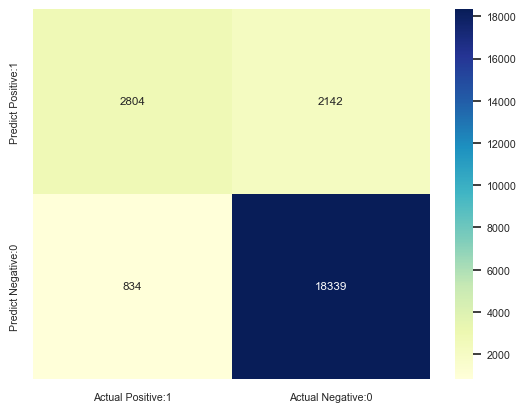

In [39]:
# sns.color_palette("rocket_r", as_cmap=True)
cm_matrix= pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                       index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [40]:
print(classification_report(y_test, prec))

              precision    recall  f1-score   support

           0       0.77      0.57      0.65      4946
           1       0.90      0.96      0.92     19173

    accuracy                           0.88     24119
   macro avg       0.83      0.76      0.79     24119
weighted avg       0.87      0.88      0.87     24119



In [41]:
# plt.scatter(x_test,y_test, color='red')
# plt.plot(x_test,regressor.predict(x_test), color = 'Blue')
# plt.title('Plotting of Test Data')

## Gradient Boosting Algorithm

In [42]:
gbm = GradientBoostingClassifier()
gbm.fit(x_train,y_train)

C:\Users\bhang\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [43]:
gbmprec = gbm.predict(x_test)

In [44]:
gbmprec

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [45]:
accuracy_score(y_test, gbmprec)

0.8783117044653592

In [46]:
cmgbm = confusion_matrix(y_test,gbmprec)
print('Confusion Matrix\n',cmgbm)

Confusion Matrix
 [[ 2870  2076]
 [  859 18314]]


<AxesSubplot: >

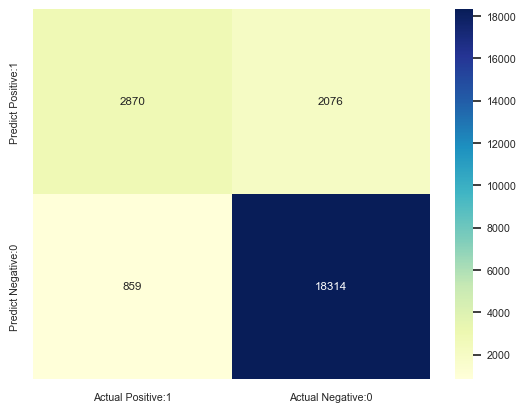

In [47]:
cmgbm_matrix = pd.DataFrame(data = cmgbm, columns=['Actual Positive:1', 'Actual Negative:0'],
                           index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cmgbm_matrix, annot=True, fmt = 'd', cmap='YlGnBu')

In [48]:
print(classification_report(y_test,gbmprec))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      4946
           1       0.90      0.96      0.93     19173

    accuracy                           0.88     24119
   macro avg       0.83      0.77      0.79     24119
weighted avg       0.87      0.88      0.87     24119



## XGBoost Algorithm

In [49]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

C:\Users\bhang\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhang\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


XGBClassifier()

In [50]:
xgbprec = xgb.predict(x_test)

In [51]:
xgbprec

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
accuracy_score(y_test,xgbprec)

0.8779800157552138

In [53]:
cmxgb = confusion_matrix(y_test,xgbprec)
print('Confusion Matrix\n', cmxgb)

Confusion Matrix
 [[ 2820  2126]
 [  817 18356]]


<AxesSubplot: >

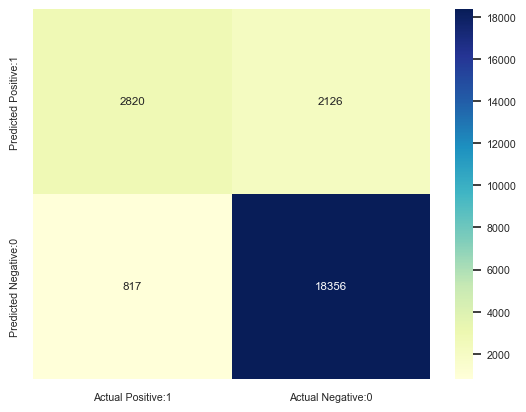

In [54]:
cmxgb_matrix=pd.DataFrame(data=cmxgb, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predicted Positive:1', 'Predicted Negative:0'])
sns.heatmap(cmxgb_matrix, annot=True, fmt= 'd', cmap='YlGnBu')

In [55]:
print(classification_report(y_test, xgbprec))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66      4946
           1       0.90      0.96      0.93     19173

    accuracy                           0.88     24119
   macro avg       0.84      0.76      0.79     24119
weighted avg       0.87      0.88      0.87     24119



## Multilayer Perceptron (MLP)

In [56]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [57]:
mp_model = Sequential()

mp_model.add(Dense(10, input_shape = (19,), activation = 'relu'))
mp_model.add(Dense(10, activation = 'relu'))
mp_model.add(Dense(10, activation = 'relu'))
mp_model.add(Dense(2, activation = 'softmax'))

In [58]:
mp_model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy', 'mse'])

In [59]:
mp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


In [60]:
mp_model.fit(x_train,
            y_train,
            batch_size= 20,
            epochs = 20,
            verbose = 1)

Epoch 1/20
4822/4822 [==============================] - 9s 2ms/step - loss: 0.5000 - accuracy: 0.7873 - mse: 0.5000
Epoch 2/20
4822/4822 [==============================] - 8s 2ms/step - loss: 0.5000 - accuracy: 0.7924 - mse: 0.5000
Epoch 3/20
4822/4822 [==============================] - 8s 2ms/step - loss: 0.5000 - accuracy: 0.7924 - mse: 0.5000
Epoch 4/20
4822/4822 [==============================] - 7s 2ms/step - loss: 0.5000 - accuracy: 0.7924 - mse: 0.5000
Epoch 5/20
4822/4822 [==============================] - 9s 2ms/step - loss: 0.5000 - accuracy: 0.7924 - mse: 0.5000
Epoch 6/20
4822/4822 [==============================] - 8s 2ms/step - loss: 0.5000 - accuracy: 0.7924 - mse: 0.5000
Epoch 7/20
4822/4822 [==============================] - 8s 2ms/step - loss: 0.5000 - accuracy: 0.7924 - mse: 0.5000
Epoch 8/20
4822/4822 [==============================] - 8s 2ms/step - loss: 0.5000 - accuracy: 0.7924 - mse: 0.5000
Epoch 9/20
4822/4822 [==============================] - 7s 1ms/step - lo